# Data Visualization using Pokemon with stats Dataset
Only data visualization.  
Meaning that I have not done any data analysis.  
## Code Referances
["Pokemon Visualization and Analysis With Seaborn"](https://www.kaggle.com/fuzzywizard/pokemon-visualization-with-seaborn)  
["Pokemon Stats"](https://www.kaggle.com/sanghan/first-gen-pokemon-stats)
## Author
[Sawada Tomoya](https://github.com/STomoya/)

In [5]:
# for handle and manipulate data
import numpy as np
import pandas as pd

# for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# init
%matplotlib inline
sns.set_style('white')

In [6]:
pokemon = pd.read_csv('./data/Pokemon.csv')
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [7]:
type(pokemon)

pandas.core.frame.DataFrame

In [8]:
# drop '#' because it is already indexed
# change the object directly by 'inplace=True'
pokemon.drop('#', inplace=True, axis=1)
pokemon.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [9]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [10]:
# 'Type 2' has null values.
# replace this with the same type as 'Type 1'
pokemon['Type 2'].fillna(pokemon['Type 1'], inplace=True)
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
Name          800 non-null object
Type 1        800 non-null object
Type 2        800 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


## Visualization

In [27]:
# unique types and thier frequency
vc = pokemon['Type 1'].value_counts()
vc

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

Text(0.5, 1.0, 'percentage of different types of Type 1 pokemon')

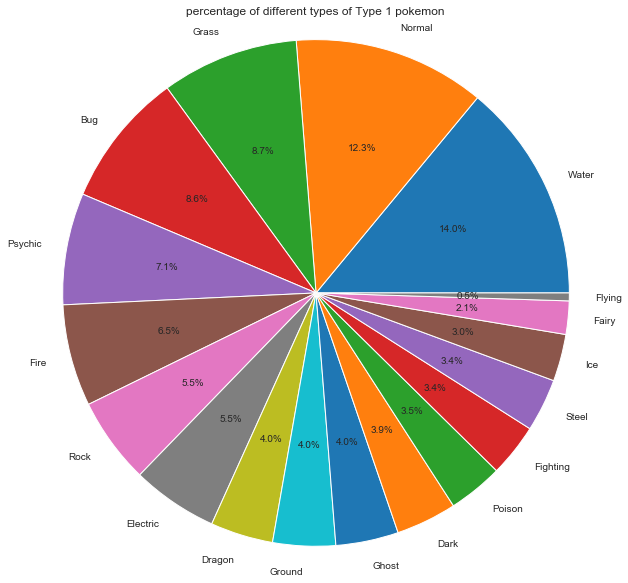

In [31]:
# plotting percetage of Type 1
plt.figure(figsize=(10,10))
plt.pie(vc, labels=vc.keys(), autopct='%1.1f%%')
plt.title('percentage of different types of Type 1 pokemon')

In [53]:
# manipulating data for later plots
pokemon4plot = pokemon.drop(['Generation', 'Legendary', 'Total'], axis=1)

In [55]:
# swarm plot
# data manipulation
pokemon4swarm = pd.melt(pokemon4plot, id_vars=["Name", "Type 1", "Type 2"], var_name="Attributes")
pokemon4swarm.head()

,Name,Type 1,Type 2,Attributes,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,VenusaurMega Venusaur,Grass,Poison,HP,80
4,Charmander,Fire,Fire,HP,39


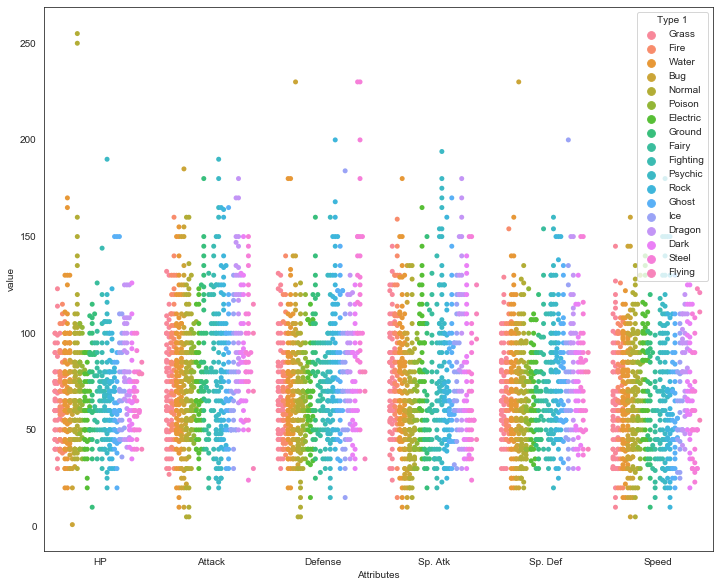

In [56]:
# plotting values of stats split by Type 1
plt.figure(figsize=(12,10))
sns.swarmplot(
    x='Attributes',
    y='value',
    data=pokemon4swarm,
    hue='Type 1',
    dodge=True
)

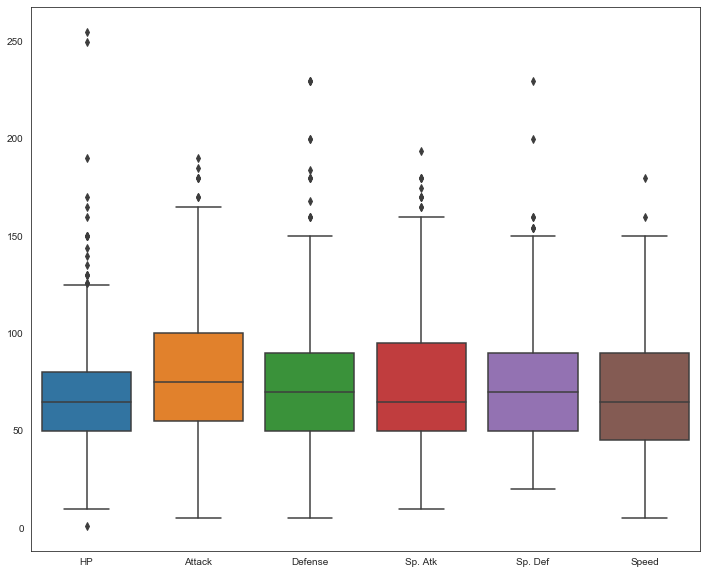

In [58]:
# box plot
plt.figure(figsize=(12,10))
sns.boxplot(
    data=pokemon4plot
)

In [81]:
# violin plot
# function for plotting violin plot
def plot_violin(pokemon, stat):
    data = pokemon[['Name', 'Type 1', stat]]
    data = data.pivot_table(
        values=stat,
        index=['Name'],
        columns=['Type 1']
    )
    plt.figure(figsize=(18,10))
    plt.ylim((0, 250))
    sns.violinplot(
        data=data,
        bw=0.5,
        linewidth=1
    )

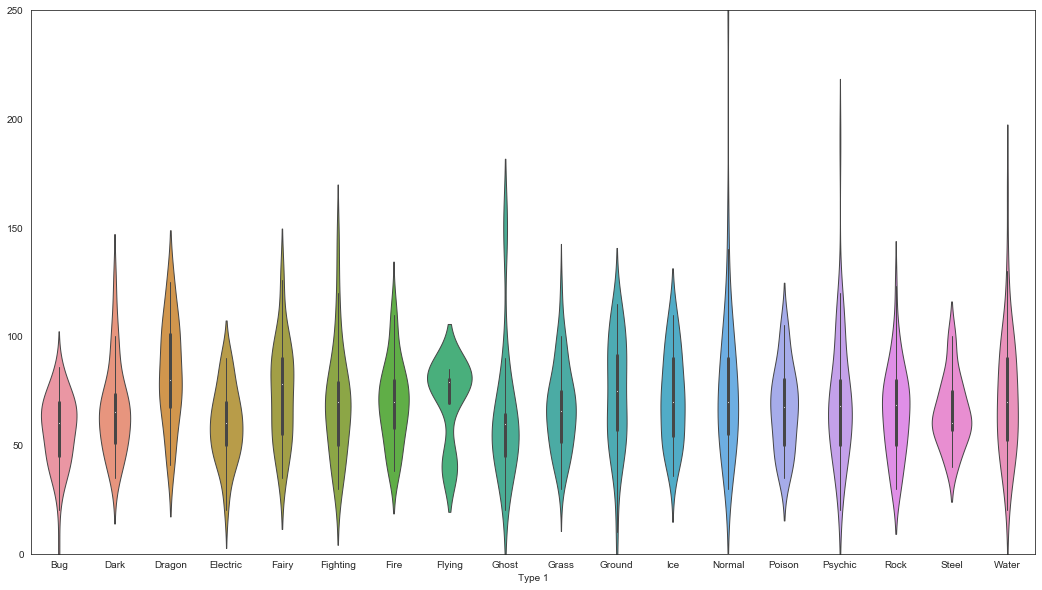

In [82]:
plot_violin(pokemon4plot, 'HP')

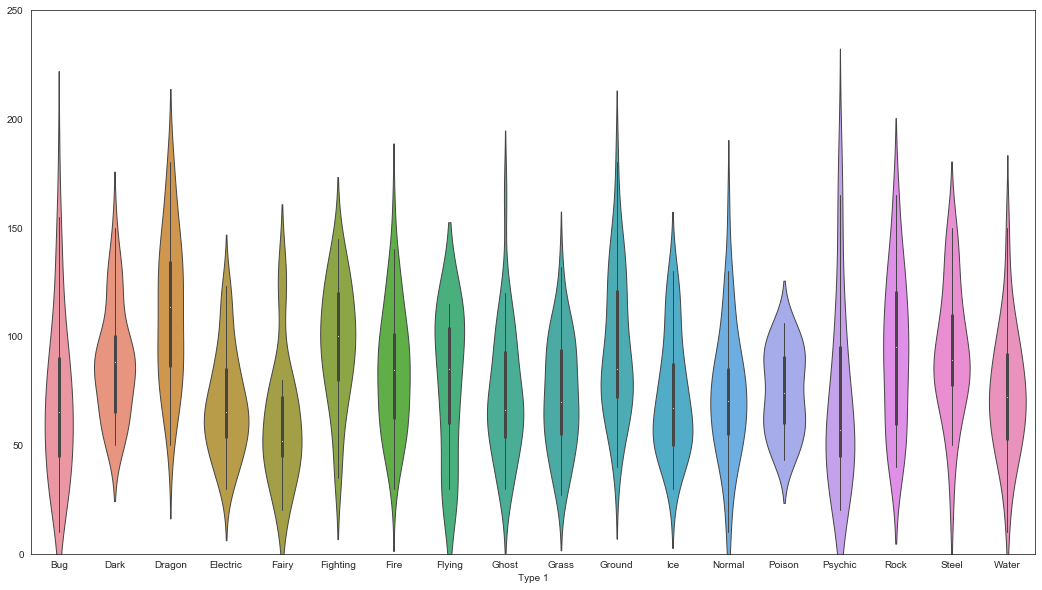

In [83]:
plot_violin(pokemon4plot, 'Attack')

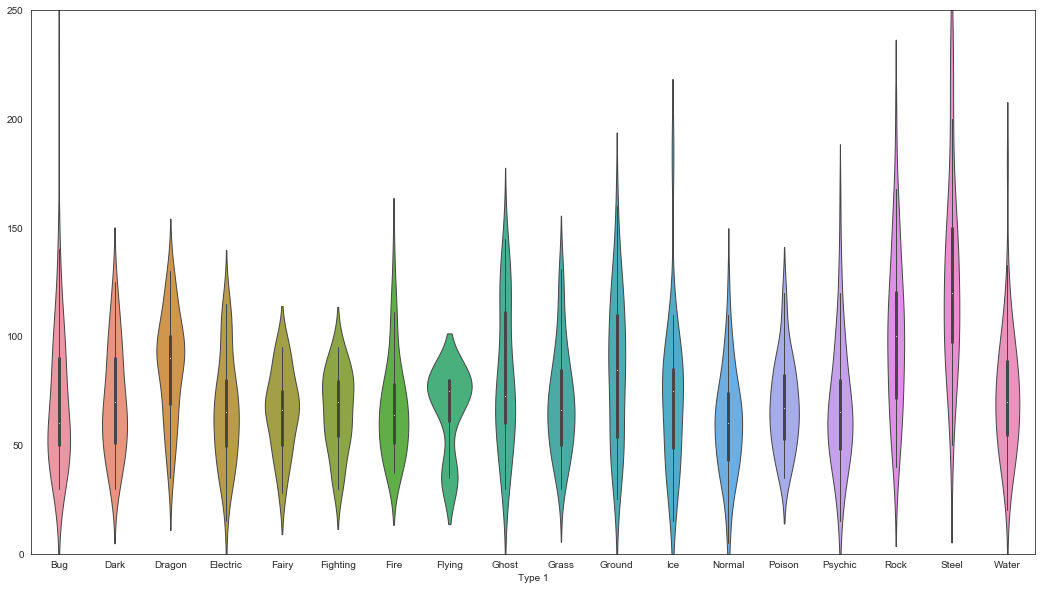

In [85]:
plot_violin(pokemon4plot, 'Defense')

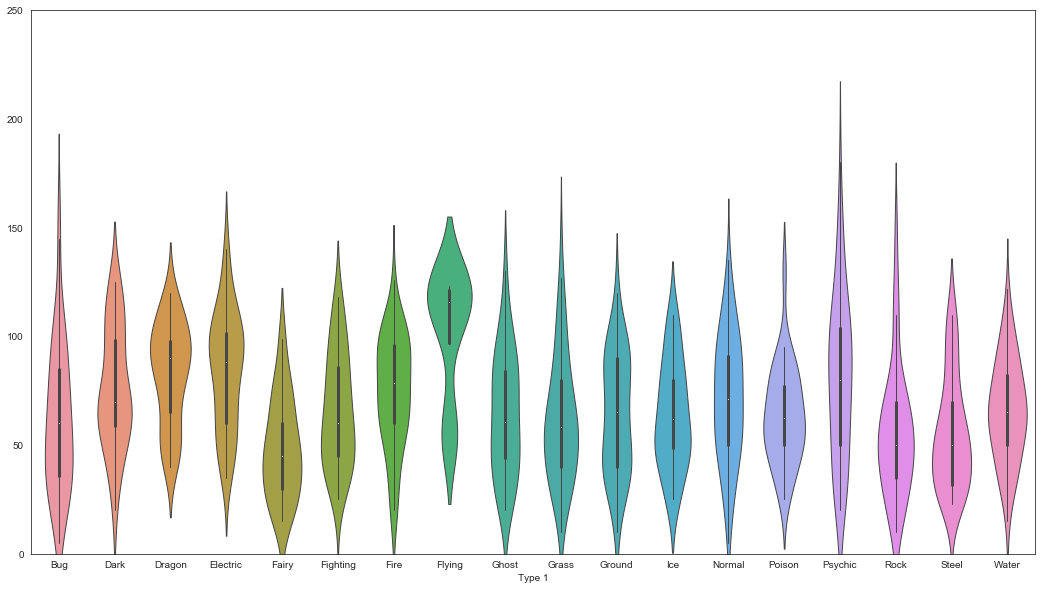

In [86]:
plot_violin(pokemon4plot, 'Speed')

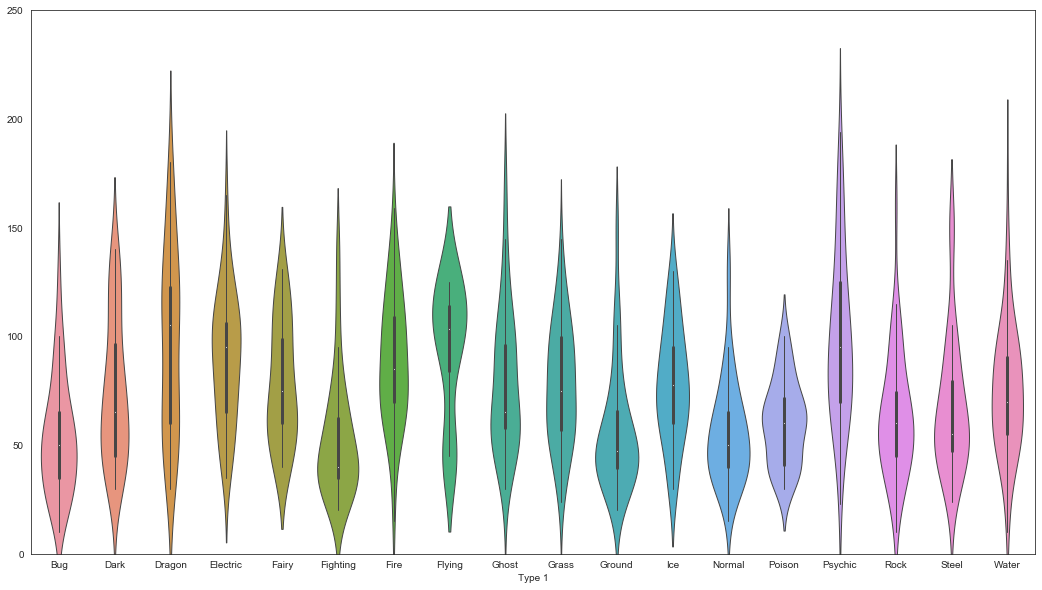

In [87]:
plot_violin(pokemon4plot, 'Sp. Atk')

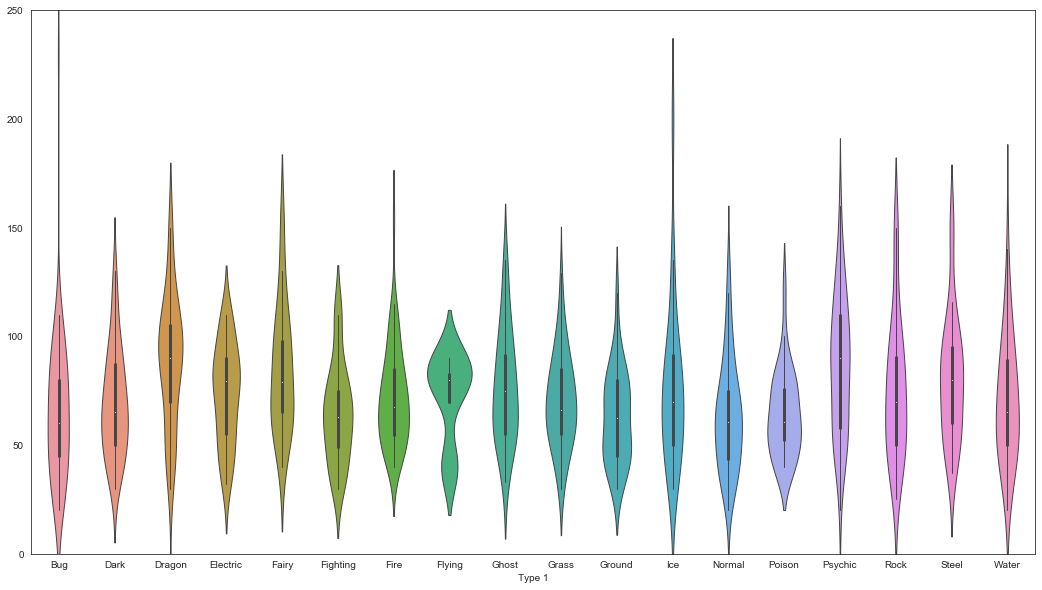

In [88]:
plot_violin(pokemon4plot, 'Sp. Def')

In [89]:
# joint plot
# function
def plot_joint(pokemon, Attribute1, Attribute2):
    sns.jointplot(x=Attribute1, y=Attribute2, data=pokemon)

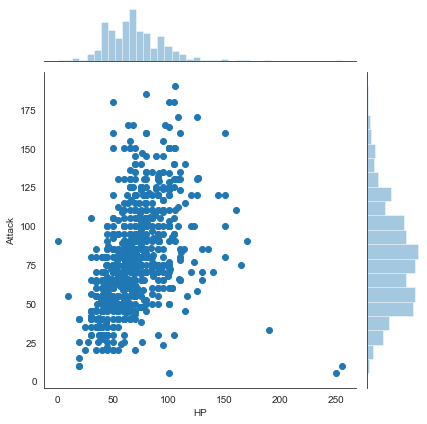

In [90]:
plot_joint(pokemon4plot, 'HP', 'Attack')

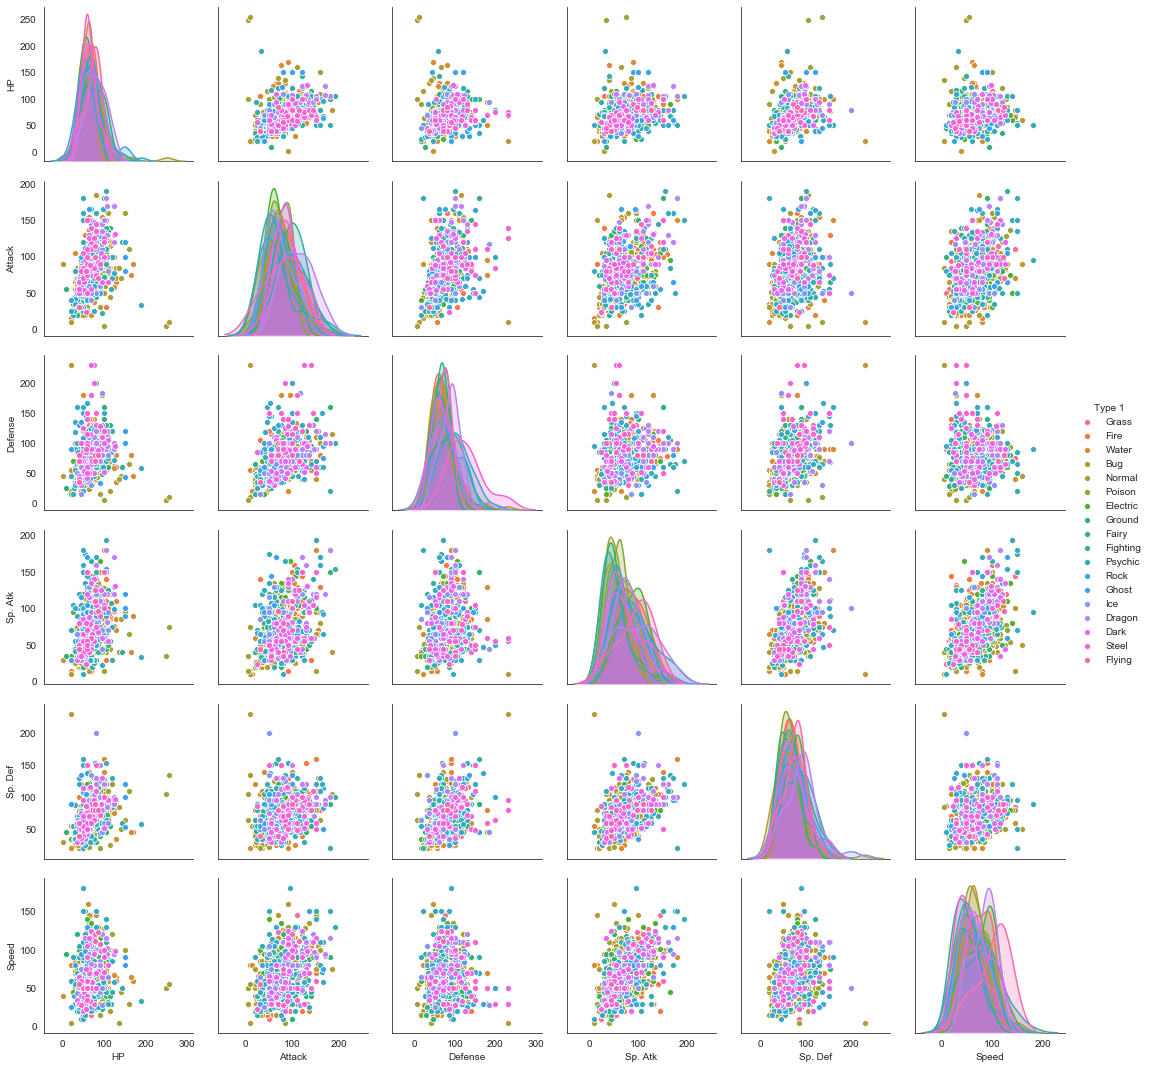

In [91]:
# this is easier...
sns.pairplot(pokemon4plot, hue='Type 1')

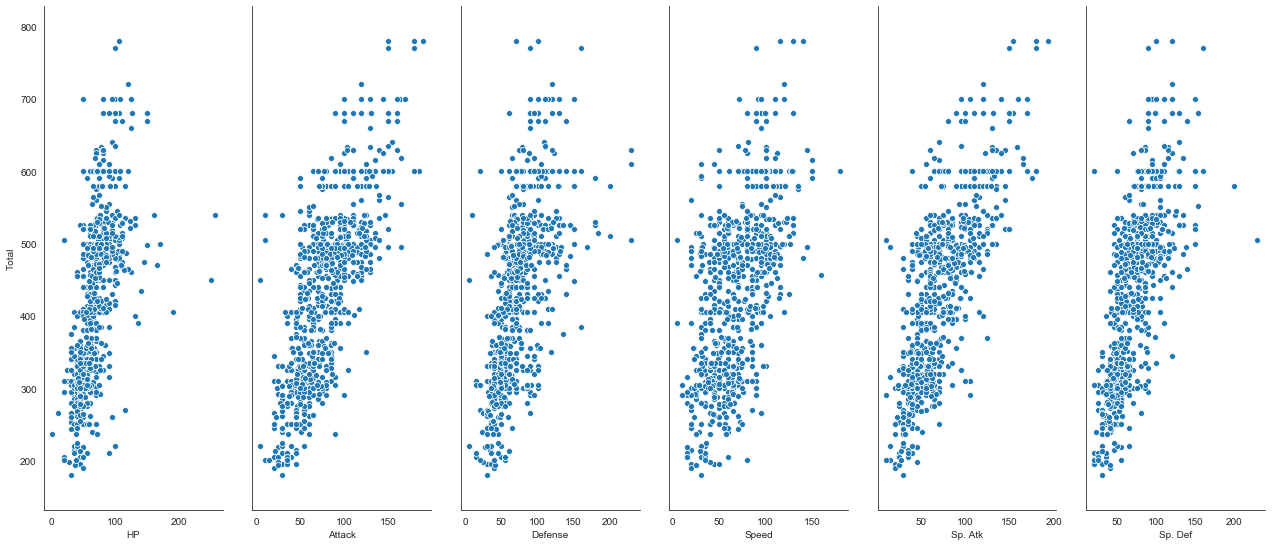

In [96]:
# pair plot compairing stats with 'Total'
g=sns.pairplot(
    data=pokemon, # using 'pokemon' because I dropped 'Total' from 'pokemon4plot'
    y_vars=['Total'],
    x_vars=['HP', 'Attack', 'Defense', 'Speed', 'Sp. Atk', 'Sp. Def']
)
g.fig.set_size_inches(18,10)

## Impressions
Not bad.  
I was impressed by how easy itis to visualize data in Python.  
I hope I can use this experience in my usual study.

# END